<a href="https://colab.research.google.com/github/DikshyaL/Regression_Models/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("neurocipher/student-performance")

print("Path to dataset files:", path)
os.listdir(path)

Using Colab cache for faster access to the 'student-performance' dataset.
Path to dataset files: /kaggle/input/student-performance


['StudentPerformance.csv']

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv(path  + "/StudentPerformance.csv")
print(df.head())
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
(10000, 6)
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
<class 'p

In [41]:
print(df.isnull().sum())
print(df.duplicated().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
127


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df["Extracurricular Activities"] = df["Extracurricular Activities"].map({
    "Yes": 1,
    "No": 0
})


features = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours","Sample Question Papers Practiced"]
X = df[features]
y= df["Performance Index"]
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model= LinearRegression()
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", np.sqrt( mean_squared_error(y_test, y_pred)))


R² Score: 0.9889832909573145
MSE: 2.020551508505006


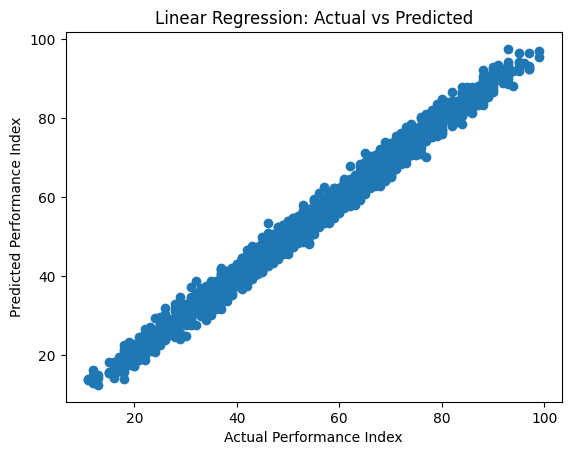

In [44]:
import matplotlib.pyplot as plt

# Predicted values
y_pred = model.predict(X_test_s)

# Plot: Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()
